In [1]:
import squarify
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
data = pd.read_csv("unemployement-rate-1948-2010.csv")
data.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
# Find all unique years in the dataset to verify this is what we want to use to delineate the tree plot
years = data["Year"].unique()

In [4]:
# Create a pandas df to visualize the labels and values
n = data.groupby('Year')[['Value']].sum()

In [5]:
# Create a list of the labels needed for the plot
x = data.groupby('Year')[['Value']].sum().index.get_level_values(0).tolist()

In [6]:
# Create a list of values for the chart
y = data.groupby('Year')[['Value']].sum().reset_index().Value.values.tolist()

Text(0.5, 1.0, 'Values by Year')

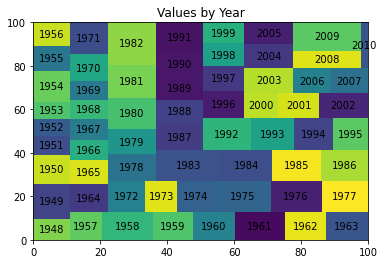

In [7]:
# Create the chart
squarify.plot(sizes=y, label=x)
plt.title("Values by Year")

Text(0.5, 1.0, 'Values by Year')

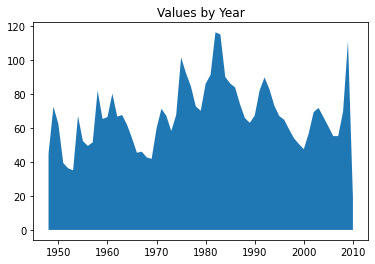

In [8]:
# Since the data is already separated, we can easily use that to create the area chart
plt.fill_between(x, y)
plt.title("Values by Year")

In [9]:
# The data is not set up in a way that can be easily put into a stacked area chart, so each year will
# have it's values split up. 

# It will be easier to visualize the monthly values against the years, so a pivot table is created using the years as columns
df = data.pivot(index='Period',columns='Year', values='Value')
df.head()

Year,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Period,,,,,,,,,,,,,,,,,,,,,
M01,3.4,4.3,6.5,3.7,3.2,2.9,4.9,4.9,4.0,4.2,...,4.2,5.7,5.8,5.7,5.3,4.7,4.6,5.0,7.7,9.7
M02,3.8,4.7,6.4,3.4,3.1,2.6,5.2,4.7,3.9,3.9,...,4.2,5.7,5.9,5.6,5.4,4.8,4.5,4.8,8.2,9.7
M03,4.0,5.0,6.3,3.4,2.9,2.6,5.7,4.6,4.2,3.7,...,4.3,5.7,5.9,5.8,5.2,4.7,4.4,5.1,8.6,NaN
M04,3.9,5.3,5.8,3.1,2.9,2.7,5.9,4.7,4.0,3.9,...,4.4,5.9,6.0,5.6,5.2,4.7,4.5,5.0,8.9,NaN
M05,3.5,6.1,5.5,3.0,3.0,2.5,5.9,4.3,4.3,4.1,...,4.3,5.8,6.1,5.6,5.1,4.6,4.4,5.4,9.4,NaN


Text(0.5, 1.0, 'Monthly values by Year')

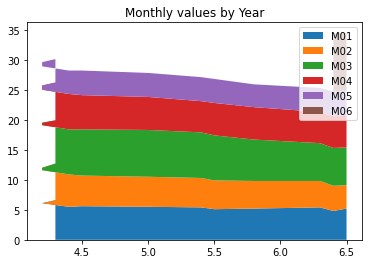

In [10]:
plt.stackplot(df[1950], 
              df[1960], 
              df[1970],
              df[1980],
              df[1990],
              df[2000],
              df[2010],
              labels = df.index)
plt.legend()
plt.title("Monthly values by Year")